# Compressing bit strings in qubits using superposition effect

### Contributors
Łukasz Herok



## Motivation

Tha aim of this tutorial is to show you how quantum computers can store information encoded in a bit string using  significantly fewer qubits than classical bits. It is possible thanks to **superposition effect**. so I will try explain it by examples.

This tutorial is designed to be an independet teaching material, so in the firsts sections  it repeats the basics that can be found in the other resuorces to make it easier to understand the final concept. If you are familiar with basics quantum computing concepts you can just skip to the "Compressing bit strings in qubits using superposition effect" section.


In [1]:
# Import of the modules and initialization of variables used in this tutorial
import numpy as np
import qiskit
from qiskit import BasicAer as Aer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import execute
import math
from qiskit.tools.visualization import plot_histogram

# qiskit.IBMQ.load_accounts()
backend = Aer.get_backend('qasm_simulator')
backend_vec= Aer.get_backend('statevector_simulator')

## Bit vs Qubit

The computer bit can store and manipulate the two states `0` and `1`. This two states maps to the two qubit  basis (orthonormal) states:


$ |0> = {\begin{bmatrix}1 \\ 0\end{bmatrix}} $,

$ |1> = {\begin{bmatrix}0 \\ 1\end{bmatrix}} $.

In fact the qubit state is represented by the linear *superposition* of these two basics states

$ |q> = \alpha |0> + \beta |1> $
so we can write
$ |q> = {\begin{bmatrix}\alpha \\ 0\end{bmatrix}} +  {\begin{bmatrix}0 \\ \beta \end{bmatrix}} =  {\begin{bmatrix} \alpha \\ \beta \end{bmatrix}} $. 

The $ \alpha $ and $ \beta $ are the probability amplitudes, and are the complex numbers. Using the formula $|\alpha|^2$ tells us about the probabilty that the qubit is in state `|0>`. So these coefficients have to meet the normalization requirement $|\alpha|^2 + |\beta|^2  = 1$ to have the overall probability equals to one.

So, as we can see the a qubit can exists in a *superposition* of states. By the measurement we can only check the probability of the each state the qubit can take. For the quantum computing, beside the basis states `|0>`, `|1>`, we often encounter the superposition states marked by `|+>`, `|->`. In these states there is is equal probability ($|\alpha|^2$ = 0.5 and $|\beta|^2 = 0.5 $) that the qubit is in one of the basis states `|0>` or `|1>`. The other possible states, with different value of amplitude coefficients, are generally called the *Mixed states*.
We can introduce a qubit into the superposition state from `|0>` to `|+>` and back to `|0>` using the *Hadamard gate*. There is no similar operation available for bits as they operates only over two states `0,1`.

### Math
The Hadamard gate is reprezented by the matrix: 

$H =  \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} $.

To create a superposition state from the `|0>`, we need to multiply the matrices:

$ H|0> 
= \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} {\begin{bmatrix}1 \\0\end{bmatrix}} 
= \frac{1}{\sqrt{2}} {\begin{bmatrix}1\cdot1 + 1\cdot0 \\ 1\cdot1 -1\cdot0\end{bmatrix}}
=  {\begin{bmatrix}0,7071 \\ 0,7071\end{bmatrix}}
= |+>
$,

so $\alpha = 0.7071$, and $\beta = 0.7071$. Making square of these we can get $0.5$ probability that the qubit is in state `|0>`, $0.5$ it is in state `|1>`.

We can of course go back to the `|0>` state using the Hadamard gate again:

$ H|+> 
= \frac{1}{\sqrt{2}} {\begin{bmatrix}1 & 1\\1 & -1\end{bmatrix}} {\begin{bmatrix}\frac{1}{\sqrt{2}}  \\\frac{1}{\sqrt{2}} \end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}
= |0>
$


### Numeric

In [38]:
# |0>
Zero = np.array([[1.],
                 [0.]]) 

H = 1./np.sqrt(2) * np.array([[1, 1],
                              [1, -1]])

print("Initial state |0> \n %s " % Zero)

Sup = np.dot(H, Zero)
print("\n H|0> = |+> \n %s" % Sup)

Back = np.dot(H, Sup)
print("\n H|+> = |0> \n %s" % Back)


Initial state |0> 
 [[1.]
 [0.]] 

 H|0> = |+> 
 [[0.70710678]
 [0.70710678]]

 H|+> = |0> 
 [[1.]
 [0.]]


### Quantum

In [39]:
q1 = QuantumRegister(1) # Qubit in the |0> state.
circ = QuantumCircuit(q1) # Circuit represents a quantum program.

circ.h(q1) # H|0>

print(circ)

         ┌───┐
q3_0: |0>┤ H ├
         └───┘


In [40]:
# To get final results from the qubit we need a classical register to store measurements
c1 = ClassicalRegister(1) 
circ.add_register(c1)
circ.measure(q1, c1)

result = execute(circ, backend=backend, shots=1024).result()
print(result.get_counts())

{'1': 519, '0': 505}


Analyzing the result of quantum program, we can see how many times the state `|1>` and `|0>` was measured. We can see that both states were measured almost the same number of times.

Let's check if using two H gated will bring us to the initial state:

In [43]:
circ = QuantumCircuit(q1)

circ.h(q1) # H|0>
circ.h(q1) # H|+>

print(circ)

         ┌───┐┌───┐
q3_0: |0>┤ H ├┤ H ├
         └───┘└───┘


In [44]:
circ.add_register(c1)
circ.measure(q1, c1)

result = execute(circ, backend=backend, shots=1024).result()
print(result.get_counts())

{'0': 1024}


this time only the `|0>` state was measured. So the qubit is back in the `|0>` state.

For the classcial bit there is no possiblity to switch it into a *mixed state* and go back to the orginal state. That give us a clue that in the quantum computer we gain a possibity to use more states using less resources to perform algoritms.

## Bit flip

Before going further we will get to know one more gate to catch better the idea of qubits manipulation. The *Pauli-X gate* changes the state from `|0>` to `|1>`. Its counterpart in the classical computers is the NOT logic gate.

$ X = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} $,


### Math

$ X|0> = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} {\begin{bmatrix}1 \\ 0\end{bmatrix}} = {\begin{bmatrix}0 \\ 1 \end{bmatrix}} = |1>$,


### Numeric

In [45]:
X = np.array([[0, 1],
              [1, 0]])

np.dot(X, Zero)

array([[0.],
       [1.]])

### Quantum

In [46]:
circ = QuantumCircuit(q1)
circ.x(q1)
print(circ)

         ┌───┐
q3_0: |0>┤ X ├
         └───┘


In [47]:
circ.add_register(c1)
circ.measure(q1, c1)

result = execute(circ, backend=backend_vec).result()
print(result.get_counts())
print(result.get_statevector())

{'1': 1}
[0.+0.j 1.+0.j]


## Making the qubytes

To store more information we can combine multiple qubits creating qubytes. It's the same what we do with bits. But, as you we will, the same size of qubyte can store lots of more information than a byte.

Using two qubits we can build states like: `|00>`, `|10>`, `|0+>` etc. To do that we make a tensor product of two qubits.

### Math

$ |01> = |0> \otimes |1> 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} \otimes {\begin{bmatrix}0 \\ 1\end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}  {\begin{bmatrix}0 \\ 1\end{bmatrix}}^{T}
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} {\begin{bmatrix}0 & 1\end{bmatrix}}
= {\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix}} 
$


### Numeric

In [10]:
One = np.array([[0.],
                [1.]]) 

# Tensor product (Kronecker prodcut in numpy)
np.kron(Zero, One)

array([[0.],
       [1.],
       [0.],
       [0.]])

### Quantum

In [48]:
q2 = QuantumRegister(2) # |00>
circ = QuantumCircuit(q2)
circ.x(q2[0]) # bit filp on a first qubit (right to left - little endian)

print(circ)

         ┌───┐
q4_0: |0>┤ X ├
         └───┘
q4_1: |0>─────
              


In [49]:
# Add measurement & Run
c2 = ClassicalRegister(2)
circ.add_register(c2)
circ.measure(q2, c2)
result = execute(circ, backend=backend_vec).result()

print(result.get_counts())
print(result.get_statevector())

{'01': 1}
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


For that purpose we can use a `initialize()`  function which will prepare the appropriate gates set. For example:

In [51]:
circ = QuantumCircuit(q2)
circ.initialize([0., 1, 0, 0.], [(q2, 0), (q2, 1)])

print(circ)


         ┌───┐┌────────────┐┌───┐┌────────────┐
q4_0: |0>┤ X ├┤ Ry(1.5708) ├┤ X ├┤ Ry(1.5708) ├
         └─┬─┘└────────────┘└─┬─┘└────────────┘
q4_1: |0>──■──────────────────■────────────────
                                               


We can see that it used CNOT and Ry gates, but the effect is the same:

In [52]:
c2 = ClassicalRegister(2)
circ.add_register(c2)
circ.measure(q2, c2)
result = execute(circ, backend=backend).result()

print(result.get_counts())

{'01': 1024}


The `initialize()` function implements a recursive initialization algorithm according to "Synthesis of Quantum Logic Circuits" Shende, Bullock, Markov https://arxiv.org/abs/quant-ph/0406176v5.

## Compressing bit strings in qubits using superposition effect

In this section we will try to save bit string `1001` in the quantum chip, and read it back. In this case the advantage of using qubits instead of bits is not surprising, but it will be much easier to catch the concept.


To store a bit string: `1001` in a classical computer we will need to use 4 bits.
For the same purpose in a quantum computer it is enough to use only 3 qubits. To take advantage of the quantum computer advantage we need to use notation which will allow us to store multiple states in the qubyte. That's the thing that is impossible on classical computers. The way for that is to write down the bit string in the notation where firsts qubits describes the position (address) in a bit string, and the last one the value on this position. For our `1001` it will be:

```
   bs | aa v 
  ----|------- 
    1 | 00 1  # the first position  (00) holds 1
    0 | 01 0  # the second position (01) holds 0
    0 | 10 0
    1 | 11 1   
```

First two qubits by `a` will be storing the address, and the third qubit `v` the value under this address. We will hold the information in quantum chip for every of the **four  address-value information in the same time**. That would be impossible using this notation and the bits because then in the same time we can address only one position of the bit string in the computer memory.
Looking at the table above we see that we need three qubits (aav) to store information about four states (`|001>, |010>, |100>, |111>`) that describe the bit string. The listed states will be encoded in the quantum chip to with the same probability:

$|bs> = \alpha |001> + \alpha |010> + \alpha|100> + \alpha|111>$

The other states that does not occur (eg. `|000>`) gets the amplitude equals to 0 ($\beta = 0$). We can write the full quantum state:

$|bs> = \beta |000> + \alpha |001> + \alpha |010> + \beta |011> + \alpha|100> + \beta |101> + \beta |110> + \alpha|111>$

as the $\alpha$ needs to meet the normalization constraint in our case should be equal to $\frac{1}{2}$.

Summarizing, using the quantum gates we need to setup our system in that a way, that after the measurement it will return only the states `|001>, |010>, |100>, |111>`  with similar probability.

In [53]:
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
circ = QuantumCircuit(q3, c3)

alpha = .5
beta = .0
circ.initialize([beta, alpha, alpha, beta, alpha, beta, beta, alpha], q3)

print(circ)

                                     ┌───┐┌───┐┌────────────┐┌───┐┌───┐»
q5_0: |0>────────────────────────────┤ X ├┤ X ├┤ Ry(1.5708) ├┤ X ├┤ X ├»
                       ┌────────────┐└─┬─┘└─┬─┘└────────────┘└─┬─┘└─┬─┘»
q5_1: |0>──────────────┤ Ry(1.5708) ├──┼────■──────────────────┼────■──»
         ┌────────────┐└────────────┘  │                       │       »
q5_2: |0>┤ Ry(1.5708) ├────────────────■───────────────────────■───────»
         └────────────┘                                                »
 c8_0: 0 ══════════════════════════════════════════════════════════════»
                                                                       »
 c8_1: 0 ══════════════════════════════════════════════════════════════»
                                                                       »
 c8_2: 0 ══════════════════════════════════════════════════════════════»
                                                                       »
«      ┌────────────┐┌───┐┌───┐┌───┐┌───┐
«q5_0: ┤ 

Above we can see a composition of quantum gates that are required to setup up qubits to represent our bit string. To check if the sequence is really making our bit string we have to add measurement at the and of the circuit and run the quantum program (the quantum circuit):

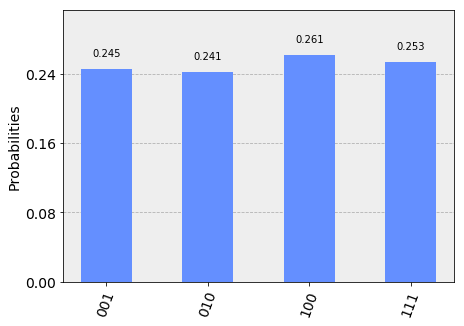

In [54]:
# Run & plot
circ.measure(q3, c3)
job = execute(circ , backend=backend)
st = job.result().get_counts()
plot_histogram(st)


Running the quantum circuit, that encodes a bit string, gives us as feedback information how many times the specific state was counted. Basing on this we can recalculate the probability, that is shown on the chart.

Looking at the chart we see that it was measured that state `|001>` exists with probability around $0.2$. The lack of the `|000>` state means that it didn't occur. It makes us sure that on the position `00` in a bit string there should be `1`.

In real life, imperfections happen. So you could use the probability to resolve ambiguities: if you find both `000` and `001` in your results, accept the most probable and reject the other as noise.

## Inverting the circut

We cen use `inverse()` function to revert the order of the gates in quantum circuit:

In [17]:
circ_inv = QuantumCircuit(q3, c3)
circ_inv.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3).inverse()
print(circ_inv)


         ┌───┐┌───┐┌───┐┌───┐┌─────────────┐┌───┐┌───┐┌─────────────┐┌───┐»
q2_0: |0>┤ X ├┤ X ├┤ X ├┤ X ├┤ Ry(-1.5708) ├┤ X ├┤ X ├┤ Ry(-1.5708) ├┤ X ├»
         └─┬─┘└─┬─┘└─┬─┘└─┬─┘└─────────────┘└─┬─┘└─┬─┘└─────────────┘└─┬─┘»
q2_1: |0>──■────┼────■────┼───────────────────■────┼───────────────────■──»
                │         │                        │                      »
q2_2: |0>───────■─────────■────────────────────────■──────────────────────»
                                                                          »
 c3_0: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
 c3_1: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
 c3_2: 0 ═════════════════════════════════════════════════════════════════»
                                                                          »
«           

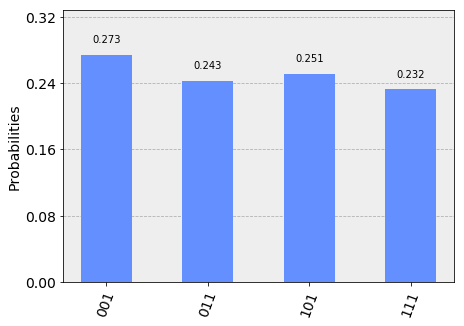

In [18]:
circ_inv.measure(q3, c3)
job = execute(circ_inv , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

If we run the inverted circut, we can find that we will not end up with inverted bitstring! Analizing the result states we can see that we have get the bitstring `1111`.

Let's see what will happen if we will connect our circuts:

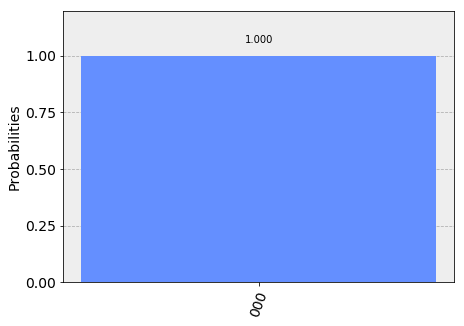

In [19]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)
circ.barrier()

circ_inv = QuantumCircuit(q3, c3)
circ_inv.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3).inverse()

circ_sum = circ + circ_inv

# Run and plot
circ_sum.measure(q3, c3)
job = execute(circ_sum , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

As we can see we get back to the initial state of our qubits! That confirms that our quanutum gates works perefectly. If we use a quantum circut to change the state form the initial state to the desiered superposition state, and then go with backward order of the operation w will finish with the initial state.

Running inverted circut on the initial state didn't give us an inverted bitstring, because it just a different program, that we run on a initial state (`0000`). If we realy would like to invert the bitstirng, flip all it's bits, then we should use a Pauli X gate on all of its qubits:

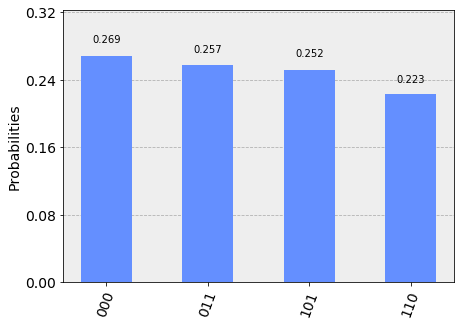

In [20]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)
circ.x(q3)

# Run and plot
circ.measure(q3, c3)
job = execute(circ , backend=backend)
st = job.result().get_counts()
plot_histogram(st)

Decoding the bits from the probabilites:

```
   bs | aa v 
  ----|------- 
    0 | 00 0 
    1 | 01 1
    1 | 10 1
    0 | 11 0   
```
we end up, as exptected, with `0110`.

### Compression effectivity

The example for 4 length bitstring is good for the step by step explantion, but doesn't show the real power of quantum computing. Making the bitstring longer shows clearer the advantange of superposition effect:

In [21]:
for i in [4, 8, 16, 32, 256, 1024, 1024*1024, 1024*1024*1024]:
    n = math.ceil(math.log2(i)) + 1
    print("qubits %s, \t bits: %s" % (n, i))


qubits 3, 	 bits: 4
qubits 4, 	 bits: 8
qubits 5, 	 bits: 16
qubits 6, 	 bits: 32
qubits 9, 	 bits: 256
qubits 11, 	 bits: 1024
qubits 21, 	 bits: 1048576
qubits 31, 	 bits: 1073741824


## Comparing bitstrings

As it was said above if we invert the circuit then we will go back to the initial state. But if we will use another bit string inverted then we will recieve the initial state only with some probability. We can use this fact to compare similarities of bitstrings. The higest probalbity to get to the initial state the more similar bitstring are.

In [37]:
circ = QuantumCircuit(q3, c3)
circ.initialize([0, .5, .5, .0, .5, .0, .0, .5], q3)
circ.barrier()

bs = {'1000': [.0, .5, .5, .0, .5, .0, .5, .0],
      '0110': [.5, .0, .0, .5, .0, .5, .5, .0],
      '1101': [.0, .5, .0, .5, .5, .0, .0, .5],
      '0011': [.5, .0, .5, .0, .0, .5, .0, .5]}

print("Similarity (probability) with 1001:")
for bitstr, ampl in bs.items():
    
    circ_inv = QuantumCircuit(q3, c3)
    circ_inv.initialize(ampl, q3).inverse()
    circ_sum = circ + circ_inv
    circ_sum.measure(q3, c3)
    job = execute(circ_sum , backend=backend, shots=1024)
    st = job.result().get_counts()
    p = st['000'] / 1024 if '000' in st.keys() else 0
    print("%s: %s" % (bitstr, p))

Similarity (probability) with 1001:
1000: 0.5478515625
0110: 0
1101: 0.5478515625
0011: 0.24609375


As we can see if all bits are different then the similairty is 0, it there are three bits in common then the probability is 0.5, if only two bits are right then we've got 0.2.

For better basics explanation you should go through: https://qiskit.org/documentation/terra/overview.html.


## Aknowlegments

Rudy Raymond, James Wootton

This tutorial bases heavily upon "Comparing Strings with Quantum Superpositon" tutorial by Rudy Raymond. It also repeats the basics that can be found in the other resuorce and in the quiskit documentation (see the Reffernces section) to make it standalone and comperhensive introduction to the tutorial topic.

## Refferences

Now you can go further to interesting tutorial .... for cmop..

